# 데이터 증강. Data Augmentation

데이터 증강 (Data augmentation) 은 이미지 회전과 같은 무작위(그러나 사실적인) 변환을 적용하여 훈련 세트의 다양성을 증가시키는 기술이다.  

매개변수를 훈련할 충분한 학습 데이터를 확보하지 않으면 모델의 성능을 저해하는 과적합(overfitting) 문제가 상대적으로 더 쉽게 발생한다.   

Data Augmentation 은 적은 양의 훈련 데이터에 인위적인 변화를 가해 새로운 훈련 데이터를 대량 확보하는 방법론을 의미한다.  

예를 들어, 이미지를 상하좌우로 뒤집거나(flipping) 자르는(cropping) 방식으로 새로운 이미지 데이터를 확보하는 것이다. 현실 세계에서도 실제로 존재할 법한 데이터를 생성함으로써 좀 더 일반화된 모델을 얻는 걸 목표로 한다.   

Tensorflow 를 이용하여 두 가지 방법으로 데이터 증강을 적용할 수 있다. 
- Keras 전처리 레이어를 사용
- `tf.image` 사용


# 0. 필요한 모듈 불러오기

```
pip install tf-nightly
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.python.keras.datasets import mnist

## 1. 데이터셋 불러오기
 TensorFlow Datasets를 사용하여 tf_flowes 데이터세트를 불러옴

In [2]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
# 데이터셋 클래스 수 확인
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


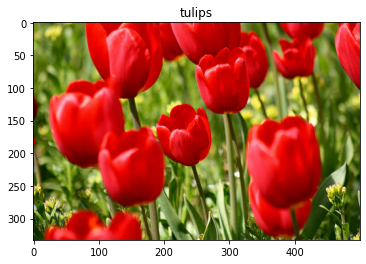

In [4]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

## 2. Data Augmentation - Keras 전처리 레이어

###  Keras 전처리 레이어 생성


#### resize
전처리 레이어를 사용하여 이미지를 일관된 모양으로 크기 조정하고 픽셀 값의 배율을 조정가능

In [5]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

크기 조정, 픽셀 정규화 완료된 이미지 결과

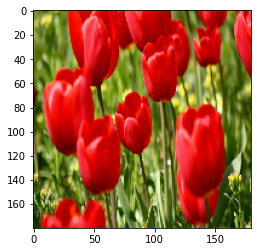

In [6]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [7]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


#### Augmentation

데이터 증강 또한 전처리 레이어를 사용할 수 있다.

In [8]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [9]:
# Add the image to a batch
image = tf.expand_dims(image, 0)

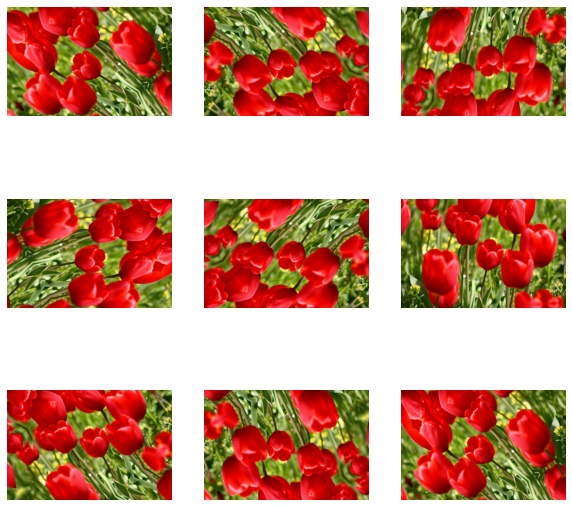

In [10]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

`tf.keras.layers.experimental.preprocessing` 에 데이터 증강에 사용할 수 있는 다양한 전처리 레이어가 존재한다.

- `CategoryCrossing`: 카테고리 교차 레이어

- `CategoryEncoding`: 카테고리 인코딩 레이어

- `CenterCrop`: 이미지의 중앙 부분을 목표 높이와 너비로 자름

- `Discretization`: 데이터를 불연속 범위로 버킷화

- `Hashing`: "해싱 트릭"이라고도 하는 범주형 기능 해싱을 구현

- `IntegerLookup`: dict 조회를 통해 정수 입력을 연속 범위에 다시 인덱싱

- `Normalization`: 데이터의 기능별 정규화

- `PreprocessingLayer`: 레이어 전처리를 위한 기본 클래스

- `RandomContrast`: 임의의 요소로 이미지의 대비를 조정

- `RandomCrop`: 이미지를 대상 높이와 너비에 맞게 무작위로 자름

- `RandomFlip`: 각 이미지를 가로, 세로로 무작위로 뒤집음

- `RandomHeight`: 훈련 중 이미지 배치의 높이를 임의로 변경

- `RandomRotation`: 각 이미지를 무작위로 회전

- `RandomTranslation`: 훈련 중 각 이미지를 무작위로 번역

- `RandomWidth`: 훈련 중에 이미지 배치의 너비를 무작위로 변경

- `RandomZoom`: 훈련 중 각 이미지를 무작위로 확대/축소

- `Rescaling`: 입력을 곱하고 scale더합니다 offset

- `Resizing`: 이미지 크기 조정 레이어

- `StringLookup`: 어휘에서 정수 인덱스로 문자열을 매핑

- `TextVectorization`: 텍스트 벡터화 레이어

#### 사용자 정의 Augmentation
`layer.Lambda` 레이어를 생성하고 서브 클래스 생성을 통해 새 레이어를 만들 수도 있다.

In [11]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [12]:
def random_invert(factor=0.5):
  return tf.keras.layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

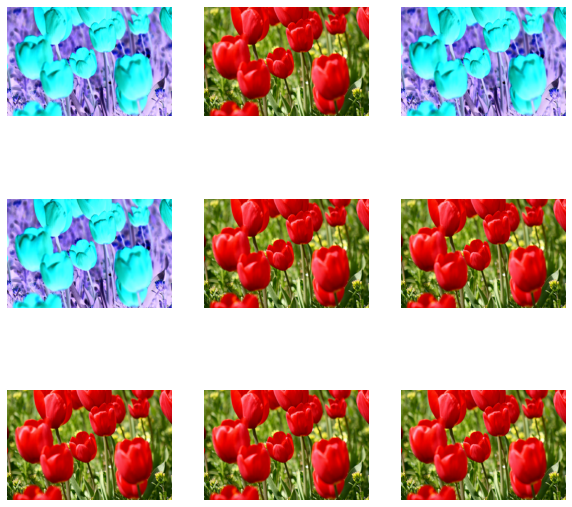

In [13]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

서브 클래스 생성을 통해 사용자 정의 레이어를 구현할 수 있다.

In [15]:
class RandomInvert(tf.keras.layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

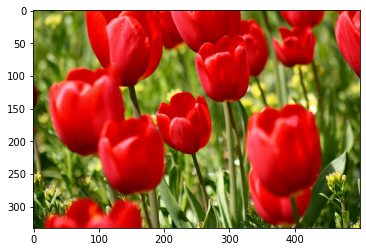

In [16]:
_ = plt.imshow(RandomInvert()(image)[0])

### 전처리 레이어 사용

위의 전처리 레이어를 사용하는 두 가지 방법이 있다.
- 전처리 레이러를 모델의 일부로 만들기
- 데이터셋에 전처리 레이어 적용

#### 전처리 레이어를 모델의 일부로 만들기

In [18]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # Rest of your model
])

이 경우 유의해야 할 두 가지 중요한 사항

- 데이터 증강은 나머지 레이어와 동기적으로 기기에서 실행되며 GPU 가속을 이용합니다.

- `model.save`를 사용하여 모델을 내보낼 때 전처리 레이어가 모델의 나머지 부분과 함께 저장됨. 나중에 이 모델을 배포하면 레이어 구성에 따라 이미지가 자동으로 표준화됨. 이를 통해 서버측 논리를 다시 구현해야 하는 노력을 덜 수 있음

참고: 데이터 증강은 테스트할 때 비활성화되므로 입력 이미지는 model.fit(model.evaluate 또는 model.predict가 아님) 호출 중에만 증강

#### 데이터 세트에 전처리 레이어 적용하기

In [19]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

이 접근 방식에서는 `Dataset.map`을 사용하여 증강 이미지 배치를 생성하는 데이터세트를 만듦

- 데이터 증강은 CPU에서 비동기적으로 이루어지며 차단되지 않음. 아래와 같이 `Dataset.prefetch`를 사용하여 GPU에서 모델 훈련을 데이터 전처리와 중첩할 수 있음
- 이 경우, 전처리 레이어는 `model.save`를 호출할 때 모델과 함께 내보내지지 않음. 저장하기 전에 이 레이어를 모델에 연결하거나 서버측에서 다시 구현해야 함. 훈련 후, 내보내기 전에 전처리 레이어를 연결할 수 있음

이번에는 두번째 방법(데이터 셋에 전처리 레이저 적용하기)를 사용하여 진행하겠다.

참고 : 첫번째 방법(전처리 레이어를 모델의 일부로 만들기)는 [여기서](https://www.tensorflow.org/tutorials/images/classification) 확인 할 수 있다.

In [20]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [21]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

### 모델 훈련

In [22]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 24s 165ms/step - loss: 1.6473 - accuracy: 0.2977 - val_loss: 1.0904 - val_accuracy: 0.5695
Epoch 2/5
92/92 [==============================] - 5s 47ms/step - loss: 1.1355 - accuracy: 0.5572 - val_loss: 0.9955 - val_accuracy: 0.6294
Epoch 3/5
92/92 [==============================] - 5s 46ms/step - loss: 1.0425 - accuracy: 0.5785 - val_loss: 1.0509 - val_accuracy: 0.6049
Epoch 4/5
92/92 [==============================] - 5s 46ms/step - loss: 0.9788 - accuracy: 0.6116 - val_loss: 0.9671 - val_accuracy: 0.6567
Epoch 5/5
92/92 [==============================] - 5s 46ms/step - loss: 0.9120 - accuracy: 0.6410 - val_loss: 0.9601 - val_accuracy: 0.6540


In [25]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 0s 14ms/step - loss: 0.9407 - accuracy: 0.6294
Accuracy 0.6294277906417847


----
----
## 3. Data Augmentation - `tf.image` 사용

보다 세밀한 제어를 위해서 `tf.data` 및 `tf.image`를 사용하여 고유한 데이터 증강 파이프라인 또는 레이어를 생성할 수 있다.

In [26]:
#기존 기본 꽃 데이터셋을 가져옴

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

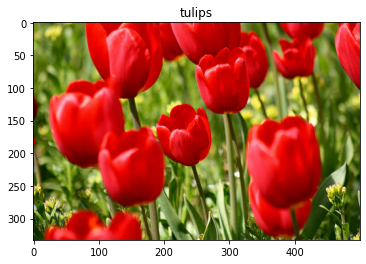

In [27]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

위 사진을 이용해 여러 데이터 증강을 구현해보겠다.

In [28]:
# 원본 이미지와 증강 이미지를 나란히 시각화하는 함수 정의
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

#### 이미지 뒤집기

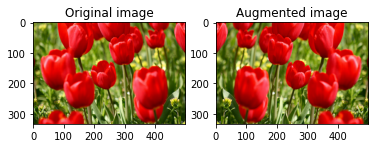

In [29]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

#### 이미지 회색조 만들기

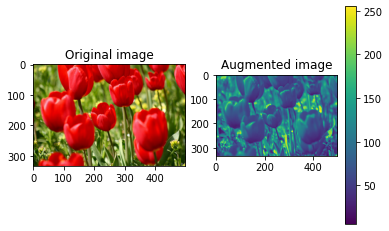

In [30]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

#### 이미지 포화시키기

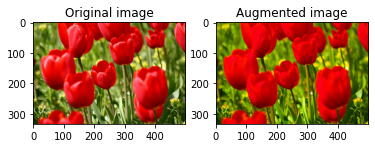

In [31]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

#### 이미지 밝기 변경하기

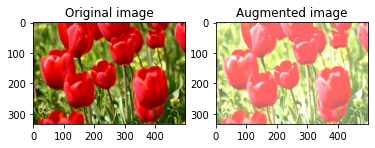

In [32]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

#### 이미지 중앙 자르기

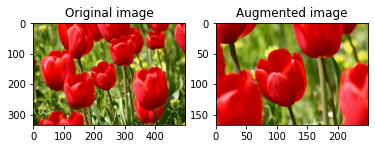

In [33]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

#### 이미지 회전하기

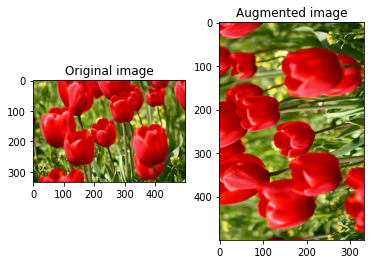

In [34]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

### 데이터세트에 증강 적용하기
`Dataset.map` 을 사용하여 데이터 증강을 데이터셋에 적용한다.

In [35]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [36]:
def augment(image,label):
  image, label = resize_and_rescale(image, label)
  # Add 6 pixels of padding
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6) 
   # Random crop back to the original size
  image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  image = tf.clip_by_value(image, 0, 1)
  return image, label

In [37]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [38]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [39]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

이렇게 데이터 증강이 완료된 데이터셋으로 모델을 훈련하고 평가할 수 있다.